In [1]:
%config IPCompleter.greedy=True

# Neuron

Let's start with simple neuron. From the biological point of view, the simplified view on neuron is following.

![Biological neuron](https://upload.wikimedia.org/wikipedia/commons/b/b5/Neuron.svg)

The dendrides are inputs of the neuron. Outputs of other neurons are connected to the neuron by dendrites. The inputs are then passed into the body of the neuron (Nucleus), that can be excitated (activated) or not. When the neuron is excitated, it's output is passed through the axons to the other neurons. This is huge simplification, but it is enough for our purposes.

How we can model this with the artifical neuron? We need to create function, that accepts the neuron's inputs and compute the output. For the simplification, inputs are weighted and summed, the result is then passed to the activation function and it's result is the output of the neuron. We can see this in the following picture.

![Artifical neuron](https://upload.wikimedia.org/wikipedia/commons/b/b6/Artificial_neural_network.png)

*(We don't take threshold into account yet)*

Mathematically, we can rewrite the picture into formula.

$$
y = f(x_1 \cdot w_1 + x_2 \cdot w_2 + \cdots + x_n \cdot w_n) \\
y = f\left(\sum_0^n(x_i \cdot w_i)\right) \\
y = f(\pmb{x} \times \pmb{w}^T) \\
y = f(\pmb{x} \pmb{w}^T)
$$

Before we continue, let's unify the terminology. I will mark vectors using bold text ($\pmb{x}$) and I will consider all one-dimensional vectors are going to be row vectors. All the vector multiplications will be dot products (if not specified otherwise) - so $\pmb{x} \pmb{w}^T$ is dot product and result is scalar. I will be indexing vectors from zero (note that the image using number 1 as the first index).

As the activation function is most of the time set up in advance, during training of the neuron (or the whole neural network), we are looking for the weights $\pmb{w}$, thats lead to the best solution.

And that is everything, we need to know so far. Now, we can go to the first model - perceptron.

# Perceptron

Perceptron is the simplest model - it uses *sign* as the activation function *f*. The *sign* function is defined as follow.

$$
sign(x) = \begin{cases}
       0 &\quad\text{if  } x < 0\\
       1 &\quad\text{if  } x \geq 0 \\
     \end{cases}
$$

The fomula defined separating hyperplane (i.e. hyperplane, that splits data's feature space into two halfs). For example if we the input data have two dimension, the separating hyperplane will be line, where all the data from the first class will be above the line, whereas all the data from the second class will end up below the line.

As the previous paragraph suggested, we can use perceptron for classification task into two classes. It is guarantee, that for lineary separable data (data, that can be separated), the perceptron learning algorithm (see below) always finds the separating hyperplane (you can check the proof for example in [[1]](#Bibliography)).

## Perceptron learning algorithm

The learning algorithm is very simple. First of all, the weights are initialized randomly. The algorithm is looking for instance, that is missclassified. If the true class of the instance is positive (and thus has been classified as negative), the instance is add to the weight vector. If, on the other hand, the instance is negative (and has been classified as positive), the instance is subtract from the weight vector. The algorithm ends, when all the instances are classified correctly.

For the classification, I am going to use random data (I call it playing dataset) generated by *sklearn* library.

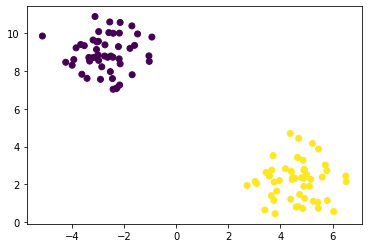

In [2]:
# Load libraries
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

# Define the sign function
def sign(x):
    return 0 if x < 0 else 1

# Generate data
data, classes = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Plot data
plt.scatter(data[:,0], data[:,1], c=classes)
plt.show()

These are the data, that we trying to classify. Now let's write the perceptron learning algorithm.

In [3]:
# Initialize the weights
weights = np.random.RandomState(42).uniform(-2, 2, 2)

# Iterate until convergence
weights_changed = True
while weights_changed:
    weights_changed = False
    
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights)
        if prediction == target:
            # correct classification
            continue
        elif target == 1:
            # positive classified as negative - add the instance to the weights
            weights = weights + instance
        elif target == 0:
            # negative classified as positive - subtract the instance from the weights
            weights = weights - instance
        weights_changed = True

As I said, the perceptron defined separating hyperplane. The hyperplane is defined by the weights of the perceptron and as we are in the 2D, the separating hyperplane is line. You maybe remember formula of line normal form $\alpha x+ \beta y+ \gamma =0$. In our case, the $\pmb{w}$ is the norm of the line and thus $\alpha=w_0$, $\beta=w_1$ and $\gamma=0$ (norm is perpendecular to the line). Let's draw the separating hyperplane.

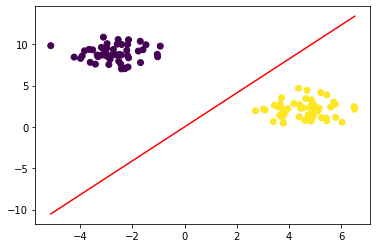

In [4]:
# Compute slope of the line
slope = - weights[0] / weights[1]

# Plot data
plt.scatter(data[:,0], data[:,1], c=classes)

# Plot the separating line
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0], slope * data.max(axis=0)[0]], 
    c='r')

As we can see, the line is between the two classes, but the line is moved a litle bit towards the yellow class. We would probably like to have the line exactly between the two classes. However, as all the points are already classified correctly, the algorithm can't adjust the line more. That is in general the drawback of the perceptron - it will find the separating hyperplane, however it don't need to (and probably never) be the best one. Let's try to change the data (by changing the generating seed) and try to train the perceptron again.

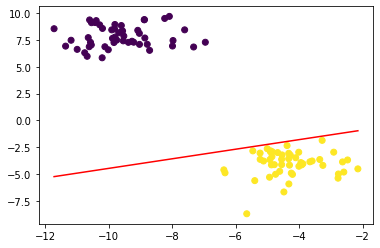

In [12]:
# DATA GENERATION
data, classes = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=48)

# PERCEPTRON TRAINING
# Initialize the weights
weights = np.random.RandomState(42).uniform(-2, 2, 2)

# Iterate until convergence
weights_changed = True
while weights_changed:
    weights_changed = False
    
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights)
        if prediction == target:
            # correct classification
            continue
        elif target == 1:
            # positive classified as negative - add the instance to the weights
            weights = weights + instance
        elif target == 0:
            # negative classified as positive - subtract the instance from the weights
            weights = weights - instance
        weights_changed = True

# PLOTTING
# Compute slope of the line
slope = - weights[0] / weights[1]

# Plot data
plt.scatter(data[:,0], data[:,1], c=classes)

# Plot the separating line
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0], slope * data.max(axis=0)[0]], 
    c='r')

# Bibliography

[1] The Perceptron Learning Algorithm and its Convergence, Shivaram Kalyanakrishnan, 21 January 2017, [online](https://www.cse.iitb.ac.in/~shivaram/teaching/old/cs344+386-s2017/resources/classnote-1.pdf)